<a href="https://colab.research.google.com/github/FutureOfTed/AI-class/blob/main/Week5/digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

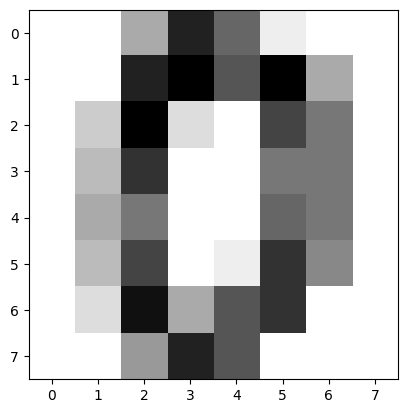

In [10]:
# 1) 데이터셋 읽기
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [12]:
# 2) 이미지 평탄화
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [13]:
# 3) 훈련 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(
  data, digits.target, test_size=0.2
)

In [14]:
# 4) 모델과 학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [15]:
# 5. 예측
# 테스트 데이터로 예측
y_pred = knn.predict(X_test)

# 정확도를 계산한다.
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9833333333333333


[3]


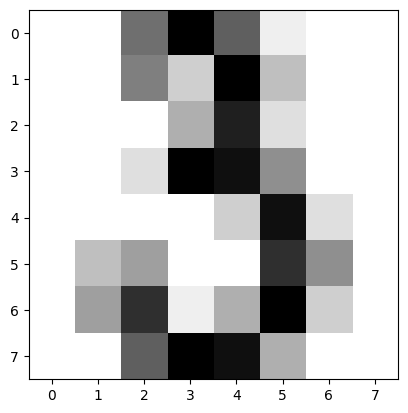

In [16]:
# 이미지를 출력하기 위하여 평탄화된 이미지를 다시 8×8 형상으로 만든다.
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

y_pred = knn.predict([X_test[10]]) # 입력은 항상 2차원 행렬이어야 한다.
print(y_pred)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 6. 데이터 불러오기
digits = datasets.load_digits()

X = digits.data      # (n_samples, 64) -> 8x8 이미지가 64픽셀 값으로 변환된 것
y = digits.target    # 정답(0~9)

In [20]:
# 7. 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [24]:
# 8. 모델 정의
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)

In [25]:
# 9. 모델 학습
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RandomForestClassifier(random_state=42)

In [29]:
# 10. 예측 결과 생성
dt_y_pred = dt.predict(X_test)
lr_y_pred = lr.predict(X_test)
knn_y_pred = knn.predict(X_test)
rf_y_pred = rf.predict(X_test)

In [30]:
# 11. 예측 결과와 정답을 비교한 정확도 평가
from sklearn.metrics import accuracy_score

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred)
lr_acc = accuracy_score(y_test, lr_y_pred)
knn_acc = accuracy_score(y_test, knn_y_pred)

print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")

print("=== KNN Test Accuracy ===")
print(f"KNN : {knn_acc:.4f}")

=== DT Test Accuracy ===
Decision Tree : 0.8426
=== RF Test Accuracy ===
Random Forest : 0.9759
=== LR Test Accuracy ===
Logistic Reg. : 0.9685
=== KNN Test Accuracy ===
KNN : 0.9926
